<a href="https://colab.research.google.com/github/Wertymuna/UTS/blob/main/Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving apply.PNG to apply (7).PNG
User uploaded file "apply (7).PNG" with length 35266 bytes


(<Axes: title={'center': 'Citra RGB'}>,
 Text(0.5, 1.0, 'Citra RGB'))

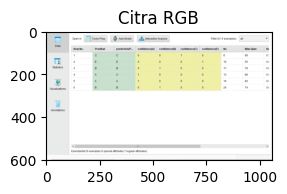

In [ ]:
from google.colab import files
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import display, Math, Latex

from PIL import Image


# upload file
upload = files.upload()

# mengulanf file yang di upload
for fn in upload.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(upload[fn])))

# Simpan path file
file_path = '/content/' + list(upload.keys())[0]  # Asumsikan hanya mengunggah satu file

# Baca gambar
img_path = '/content/' + list(upload.keys())[0]
img_rgb = cv2.imread(img_path)

#tampilakan gambar yang sudah di upload
plt.subplot(1,2,1),plt.imshow(img_rgb[:,:,::-1]),plt.title('Citra RGB')

(array([8.912000e+03, 7.000000e+00, 5.530000e+02, 1.200000e+01,
        2.650000e+02, 1.600000e+02, 3.700000e+01, 1.017000e+03,
        6.410000e+02, 5.870000e+02, 2.918000e+03, 1.757000e+03,
        2.610000e+02, 1.460000e+02, 8.600000e+01, 3.000000e+02,
        3.800000e+02, 2.033000e+03, 7.050000e+02, 1.460000e+02,
        1.633000e+03, 2.140000e+02, 4.150000e+02, 1.740000e+02,
        1.289000e+03, 7.720000e+02, 2.660000e+02, 1.655000e+03,
        2.220000e+02, 6.800000e+02, 1.660000e+02, 1.521000e+03,
        6.861400e+04, 3.600000e+02, 2.980000e+03, 1.944000e+03,
        1.937000e+04, 2.254000e+03, 1.054200e+04, 5.183600e+04,
        6.330500e+04, 1.750000e+02, 5.475000e+03, 4.233700e+04,
        7.833600e+04, 1.792190e+05, 8.729000e+03, 1.474310e+05,
        8.337000e+03, 1.184156e+06]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 12

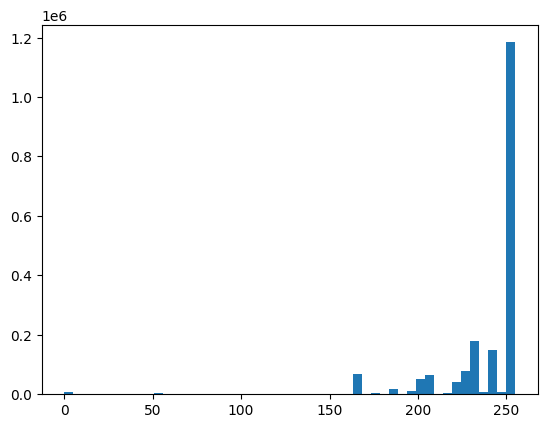

In [ ]:

# convert gambar ke numpy array
img = np.asarray(img_rgb)

# letakkan piksel dalam larik 1D dengan meratakan larik img
flat = img.flatten()

# lihat histogram dari gambar
plt.hist(flat, bins=50)

In [ ]:
# rumus untuk membuat histogram
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

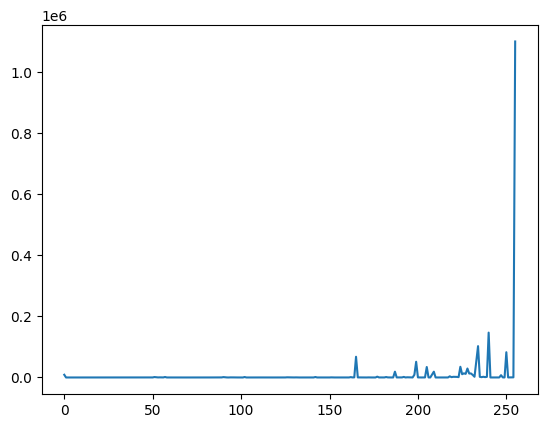

In [ ]:

# buat fungsi histogram kita sendiri
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)

    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1

    # return our final result
    return histogram

hist = get_histogram(flat, 256)

plt.plot(hist)

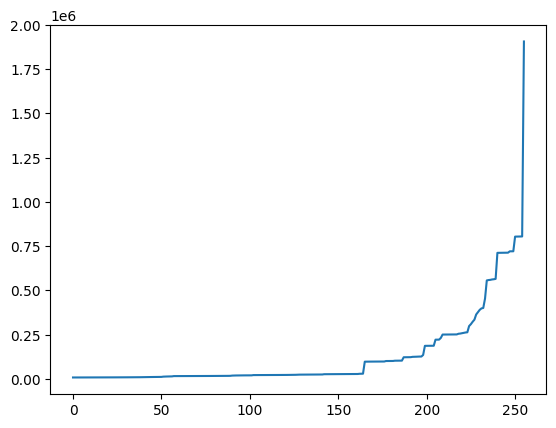

In [ ]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

In [ ]:
# formula to calculate cumulation sum
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

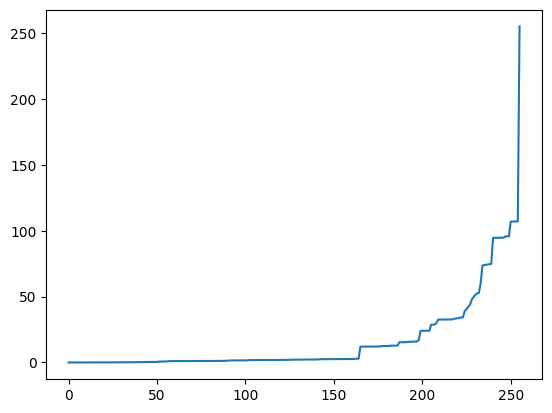

In [ ]:
# re-normalize cumsum values to be between 0-255

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N

plt.plot(cs)

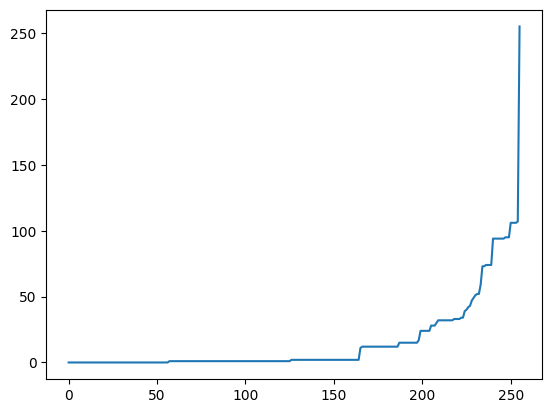

In [ ]:
# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

(array([  30288.,       0.,   96789.,    8917.,   52010.,   44139.,
          31882.,   45723.,   25382.,   42328.,   23741.,   52828.,
              0.,       0.,  111379.,       0.,       0.,       0.,
         155768.,       0.,   83709.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0., 1100447.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer obje

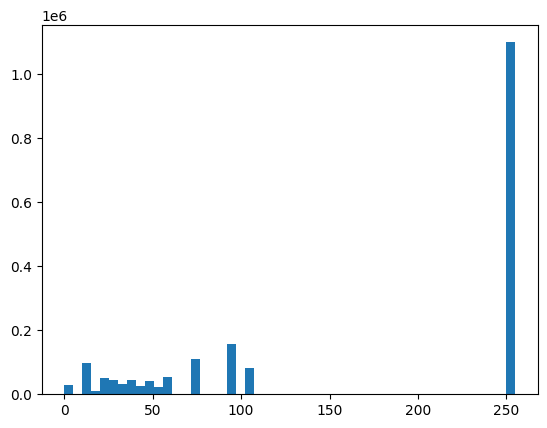

In [ ]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=50)

In [ ]:
# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)
img_new

array([[[106, 106, 106],
        [106, 106, 106],
        [ 74,  74,  74],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]],

       [[106, 106, 106],
        [106, 106, 106],
        [ 24,  24,  24],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]],

       [[106, 106, 106],
        [106, 106, 106],
        [ 15,  15,  15],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]],

       ...,

       [[106, 106, 106],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]],

       [[106, 106, 106],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]],

       [[ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15],
        ...,
        [  1,   0,   0],
        [  0,   0,   0],
        [  1,   0,   0]]

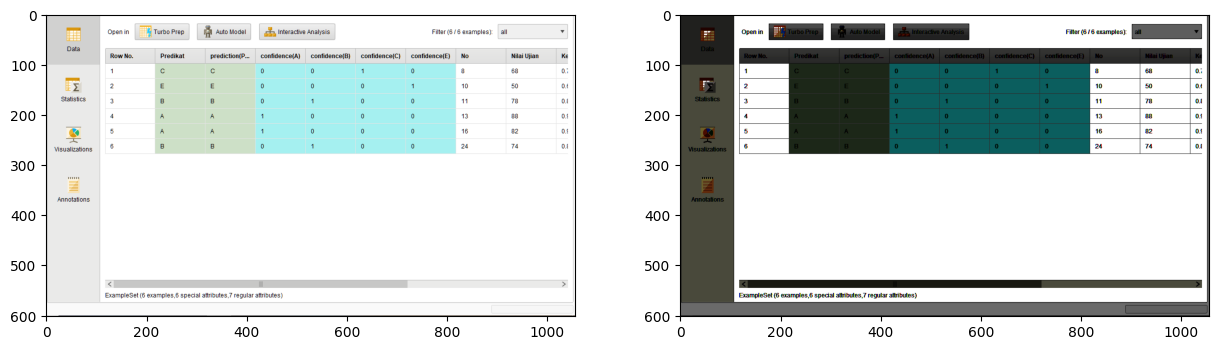

In [ ]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)
